## E-Commerce Market Analysis ##

To showcase various statistical methods for determining the best markets to advertise to, this project will use a fictional e-commerce company as a backdrop. 

Our e-commerce company offers learning courses on areas such as web and mobile development, data science, game development etc. and we want to determine the best market to advertise our learning courses to utilizing statistical methods.

## Data Used ##

To help make our analysis cost-efficient and easier, we'll be using survey data from FreeCodeCamp's [2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey). This dataset received over 18,000 responses from self learning coders from across the experience spectrum, which falls within our target market. The dataset can be found at the link above along with it's documentation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
data = pd.read_csv(link, low_memory = 0) # low_memory = False to silence dtypes warning

In [4]:
data.shape
# Set max columns larger so data doesn't get lost when viewing tables
pd.options.display.max_columns = 140 

In [5]:
data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Population Analysis ##

We need to explore whether the sample data we have is representative of our target population of new coders. We want to see: 

* What roles / jobs they're interested in
* What subject(s) are they interested in
* How many people are interested in our core proficiences, web & mobile development?

Since people can be interested in more than one subject and mark it as such, we'll have to see how many people bu web development or mobile development as one of their choices, versus the only choice

In [11]:
data["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                      

In [26]:
#Drop NAs from dataset for Job Interest
data_no_nulls = data.dropna(subset=["JobRoleInterest"])

searchfor = ["Web Developer", "Mobile Developer"]
data_no_nulls["WeborMobileDevelopmentInterest"] = data_no_nulls["JobRoleInterest"].str.contains("|".join(searchfor), na=False)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


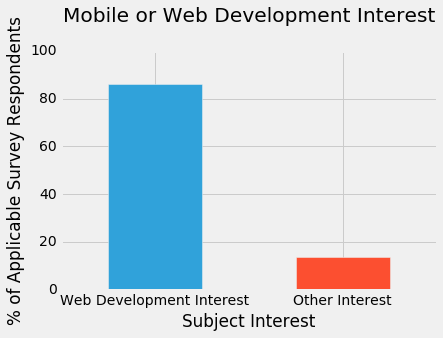

In [43]:
web_dev_interest = data_no_nulls["WeborMobileDevelopmentInterest"].value_counts(normalize = True) * 100


plt.style.use('fivethirtyeight')

web_dev_interest.plot.bar()
plt.title("Mobile or Web Development Interest", y = 1.10)
plt.xlabel("Subject Interest")
plt.ylabel("% of Applicable Survey Respondents")
plt.ylim([0,100])
plt.xticks([0,1],["Web Development Interest", "Other Interest"], rotation = 0)
plt.show()




In [45]:
data_no_nulls["JobRoleInterest"].value_counts()

Full-Stack Web Developer                                                                                                                                                                               823
  Front-End Web Developer                                                                                                                                                                              450
  Data Scientist                                                                                                                                                                                       152
Back-End Web Developer                                                                                                                                                                                 142
  Mobile Developer                                                                                                                                                                          

## Results ##

Based on the results above, we can see that at least the majority of our applicable sample, adults that have indicated a job interest in web development are the majority of our survey responsdents, so 80%+ of our sample, are interested in web development or mobile development.

## Population Inferences ##

We can now see once we remove survey respondents that didn't answer about their job interests, the majority of respondents are interested in web & mobile development (6030 / 6992) or 86%

In [73]:
number_of_respondents = data_no_nulls["CountryLive"].value_counts()

In [74]:
percent_of_respondents = data_no_nulls["CountryLive"].value_counts(normalize=True)*100

In [75]:
respondent_table = pd.DataFrame(data = {'Number of Respondents': number_of_respondents,
                                        'Percent of Respondents': percent_of_respondents})

respondent_table


,Number of Respondents,Percent of Respondents
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


## Initial Market Results ## 

The two biggest markets are the United States of America (USA) and India, with 3100+ and 500+ respondents in our sample of ~6000 people respectively. They make up ~45% and 7% of the total sample, so these would initially be the two largest markets I would suggest focusing on for web & mobile developer advertising based on interest.

However, we should explore in a little more detail and see how much learners are willing to pay to learn to code, because we don't want to advertise somewhere where people aren't willing to spend money to learn.

## Value by Country ## 

The "MoneyForLearning" is a column where survey respondents answered how much in money (in USD) they've spent on learning to code from when they started until the moment they've completed the survey. 

Since our company sells subscriptions at $59/month, we want to find out how much money each student spends **per month**.

Since our courses are in English, we should focus are analysis on countries where English is the official language, and that has the highest proportion of respondents to analyze. This suggests limiting to the US, Canada, India and the UK.

In [84]:
# We'll need to replace any months programming values of 0 with "1" for
# individuals who just started to code to get an accurate monthly 
# spend and not divide by 0.

# First let's replace all 0s with 1 from the Month's Programming feature

data['MonthsProgramming'].replace(0,1, inplace = True)

data["MonthlySpend"] = data["MoneyForLearning"] / data["MonthsProgramming"]

# Let's see the number of nulls

data["MonthlySpend"].isnull().sum()

# Let's get rid of the nulls

spend_no_nulls = data["MonthlySpend"].notnull()

monthly_spend_no_nulls = data[spend_no_nulls]


In [86]:
monthly_spend_no_nulls.shape

(16577, 137)

In [88]:
# There's still plenty of representative data for the countries 
# we care about, in this case the US, India, UK and Canada

monthly_spend_no_nulls["CountryLive"].value_counts().head(5)

United States of America    5584
India                       1248
United Kingdom               712
Canada                       587
Brazil                       321
Name: CountryLive, dtype: int64

In [89]:
grouped = monthly_spend_no_nulls.groupby("CountryLive").MonthlySpend.mean()

In [90]:
grouped

CountryLive
Afghanistan                    8.333333
Albania                       13.750467
Algeria                        2.636166
Angola                        70.000000
Anguilla                       0.000000
Argentina                     37.502190
Armenia                       20.833333
Australia                    213.489196
Austria                      380.254431
Azerbaijan                    34.761905
Bahrain                        0.000000
Bangladesh                    82.840091
Barbados                       0.000000
Belarus                       15.621882
Belgium                       56.054167
Belize                         5.555556
Benin                         12.500000
Bermuda                        0.000000
Bolivia                       56.666667
Bosnia & Herzegovina          14.407358
Botswana                       0.000000
Brazil                        64.198793
British Indian Ocean Ter       0.000000
Brunei                         7.500000
Bulgaria                    

In [94]:
# Let's only include the countries we care about using Match

countries = ["United States of America", "United Kingdom", "India", "Canada"]
countries_of_interest = monthly_spend_no_nulls["CountryLive"].str.match("|".join(countries), na=False)
country_data = monthly_spend_no_nulls[countries_of_interest]

country_data["CountryLive"].value_counts()

United States of America    5584
India                       1248
United Kingdom               712
Canada                       587
Name: CountryLive, dtype: int64

In [97]:
grouped_countries = country_data.groupby("CountryLive").MonthlySpend.mean()

In [98]:
grouped_countries

CountryLive
Canada                      133.858404
India                        66.545263
United Kingdom               71.654405
United States of America    237.826786
Name: MonthlySpend, dtype: float64

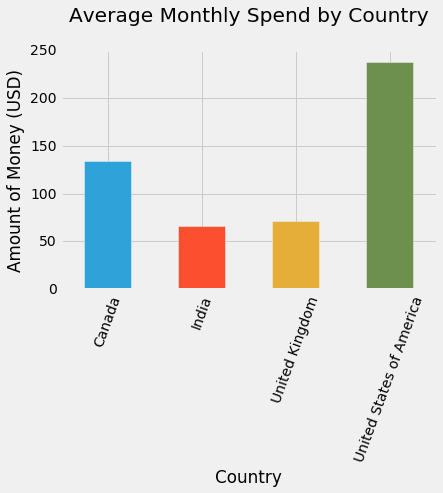

In [103]:
plt.style.use('fivethirtyeight')

grouped_countries.plot.bar()
plt.title("Average Monthly Spend by Country", y = 1.10)
plt.xlabel("Country")
plt.ylabel("Amount of Money (USD)")
plt.ylim([0,250])
plt.xticks(rotation = 70)
plt.show()




## Results ##

Suprisingly, India spends more (according to our survey sample) on E-Learning than Canada or the UK, which is not what we would expect given the average median income available to the middle class in Canada or the UK versus India [(Link)](https://en.wikipedia.org/wiki/Median_income#Gross_median_household_income_by_country).

Given the results, it may be we have some outliers in our data, skewing the average upwards, or the sample may not be representative of our target markets

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


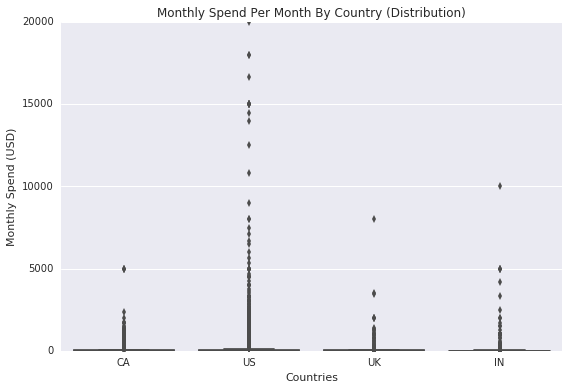

In [115]:
import seaborn as sns
x = country_data["CountryLive"]
y = country_data["MonthlySpend"]
sns.boxplot(x, y, data=country_data)

plt.title("Monthly Spend Per Month By Country (Distribution)")
plt.ylim([0,20000])
plt.ylabel("Monthly Spend (USD)")
plt.xticks([0,1,2,3],["CA", "US", "UK","IN"])
plt.xlabel("Countries")
plt.show()


## Results ## 

We can see a few extreme results in India with ~\$2000 - \$5000 spend per month that could be moving their average above the UK and Candada, but it's hard to tell any detail just from examining the boxplot. We'll have to investigate to see if they've attended more bootcamps or other expensive options that may be skewing results.

## Outliers Deep Dive ##

Let's investigate Outliers in the various countries, and drop them if necessary to get a more accurate understanding of the market

In [121]:
india_outliers = country_data[
    (country_data["MonthlySpend"] >= 2500) & 
    (country_data["CountryLive"] == "India")]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,N

In [130]:
us_outliers = country_data[
    (country_data["MonthlySpend"] >= 10000) & 
    (country_data["CountryLive"] == "United States of America")]

# About half of US outliers have attended a bootcamp

us_outliers["AttendedBootcamp"].value_counts()


# However, about half the US are new coders, with only 1 month of programming
# experience, it's unlikely their monthly cost would be that high normally

us_outliers["MonthsProgramming"].value_counts()

1.0     13
2.0      3
12.0     1
5.0      1
6.0      1
Name: MonthsProgramming, dtype: int64

## Outliers Initial Results - US & India ##

Due to India and the US outliers skewing the data, we should remove these folks from our dataset, in particular:

* Anyone in India who is an extreme outlier who didn't attend a bootcamp, as it may be they interpreted the question wrong and/or answered it incorrectly
* Anyone in the US who has only 1 or 2 months of programming experience as their average monthly spend would likely not be that high normally given most bootcamps are a one time fee, or anyone that has a monthly fee that high in general

In [131]:
country_data = country_data.drop(india_outliers.index)

In [132]:
country_data = country_data.drop(us_outliers.index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


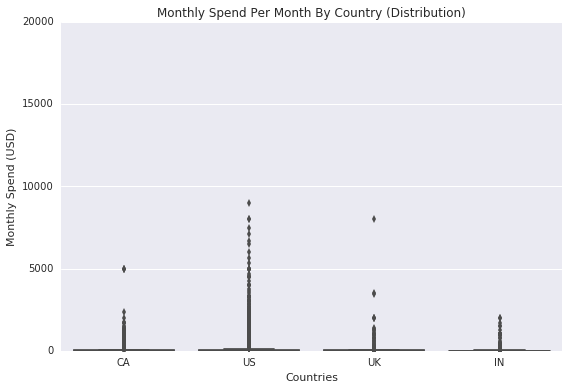

In [133]:
# Let's re-examine the boxplot now without the extreme values

import seaborn as sns
x = country_data["CountryLive"]
y = country_data["MonthlySpend"]
sns.boxplot(x, y, data=country_data)

plt.title("Monthly Spend Per Month By Country (Distribution)")
plt.ylim([0,20000])
plt.ylabel("Monthly Spend (USD)")
plt.xticks([0,1,2,3],["CA", "US", "UK","IN"])
plt.xlabel("Countries")
plt.show()


## Outliers - CA & UK ##

We can see there is one extreme outlier in CA and one in the UK, let's see if we see anything off about their resuls (i.e. inaccurate data) and we can drop them if necessary

In [134]:
ca_outliers = country_data[
    (country_data["MonthlySpend"] >= 4500) & 
    (country_data["CountryLive"] == "Canada")]

uk_outliers = country_data[
    (country_data["MonthlySpend"] >= 7000) & 
    (country_data["CountryLive"] == "United Kingdom")]


In [142]:
ca_outliers

ca_outliers["AttendedBootcamp"].value_counts()

ca_outliers["MonthsProgramming"].value_counts()

1.0    2
2.0    1
Name: MonthsProgramming, dtype: int64

In [138]:
uk_outliers["MonthsProgramming"]

9310    1.0
Name: MonthsProgramming, dtype: float64

## Outliers - UK & Canada 

It appears the Canada person is so high because they just started programming (1 month) and are attending a bootcamp. We can drop them as their monthly average would likely not be that high otherwise.

In the UK, the three outliers are new to programming, and only one has attended bootcamp. It doesn't make sense how they've spent so much if they haven't attended a bootcamp, and given the extreme nature of their monthly spend, we can drop them as well from our dataset.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


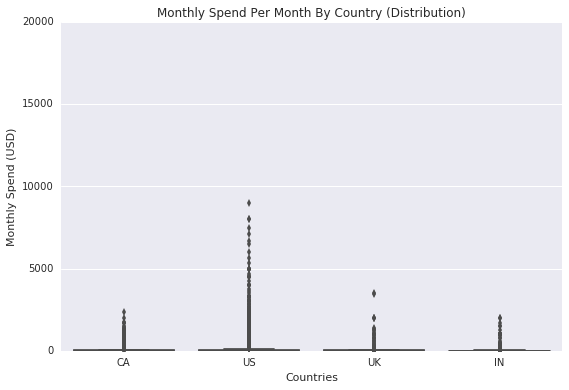

In [143]:
# Drop UK & CA outliers and re-do our boxplot and average spend 
# by country

country_data = country_data.drop(ca_outliers.index)
country_data = country_data.drop(uk_outliers.index)

x = country_data["CountryLive"]
y = country_data["MonthlySpend"]
sns.boxplot(x, y, data=country_data)

plt.title("Monthly Spend Per Month By Country (Distribution)")
plt.ylim([0,20000])
plt.ylabel("Monthly Spend (USD)")
plt.xticks([0,1,2,3],["CA", "US", "UK","IN"])
plt.xlabel("Countries")
plt.show()




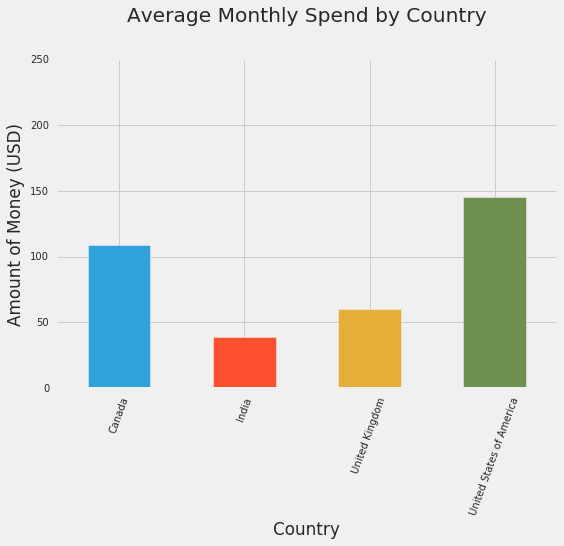

In [144]:
grouped_countries = country_data.groupby("CountryLive").MonthlySpend.mean()

plt.style.use('fivethirtyeight')

grouped_countries.plot.bar()
plt.title("Average Monthly Spend by Country", y = 1.10)
plt.xlabel("Country")
plt.ylabel("Amount of Money (USD)")
plt.ylim([0,250])
plt.xticks(rotation = 70)
plt.show()




## Results ## 

After removing extreme outliers from the data, we see that the US and Canada appear to be our most lucrative opportunities, with ~\$150 USD spend per month (the US) and ~\$100 USD spend per month (Canada).

We could also make a case for trying to launch a "freemium" or cheaper product than our \$59 offerin given the population size in Canada appears to be significantly smaller than in India given our overall survey results.

While the US & Canada appear to be the most lucrative markets with the most money to spend, India has the 2nd most amount of potential customers, so it might be worth exploring some sort of business solution there as well.

In [146]:
country_data["CountryLive"].value_counts()

United States of America    5565
India                       1241
United Kingdom               711
Canada                       584
Name: CountryLive, dtype: int64